# Reboot - SQL Advanced

Tonight, we will use the Blog SQLite database:

In [ ]:
!tree

## 1. Schema ERD

❓ Open the `data/blog.sqlite` in DBeaver, explore the schema and draw it on [kitt.lewagon.com/db](https://kitt.lewagon.com/db).

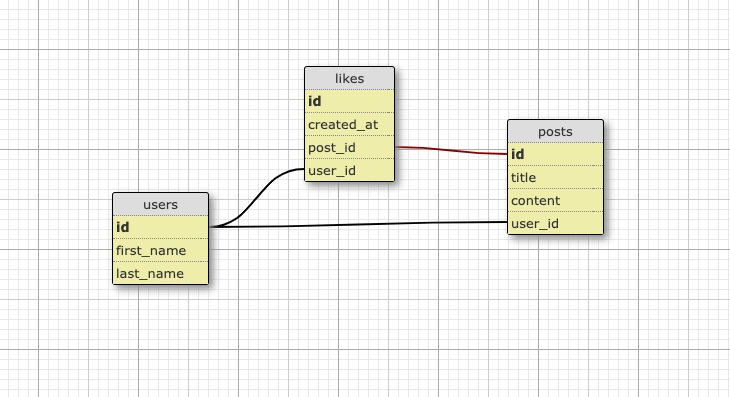

---
## 2. Most liked posts

Complete the code to get **the 3 most liked posts**:

In [1]:
import sqlite3

conn = sqlite3.connect("data/blog.sqlite")
c = conn.cursor()

# TODO: write the query
query = """
SELECT posts.title, COUNT(*) AS likes_count
FROM posts
JOIN likes ON likes.post_id = posts.id 
GROUP BY posts.id 
ORDER BY likes_count DESC 
LIMIT 3
"""

# TODO: Execute the query
c.execute(query)

# TODO: Fetch and print the results
results = c.fetchall()
print(results)

[('Half imagine another.', 84), ('Side foot leader popular.', 82), ('Area paper whatever mean.', 81)]


---

### Pretty Print using _pandas_

The readbility of our `print()` statements is not so good.

Next week, we will introduce [pandas](https://pandas.pydata.org/) which will vastly improve the UX of our data exploration in Notebooks.

Execute the following cell to load `pandas` library:

In [2]:
import pandas as pd

Then try the previous `query` again, delegating the job of fetching results + displaying them to the `read_sql_query` function of `pandas`:

In [3]:
pd.read_sql_query(query, conn)

,title,likes_count
0,Half imagine another.,84
1,Side foot leader popular.,82
2,Area paper whatever mean.,81


---
## 3. Find the three users who 'liked' the most

In [4]:
# import sqlite3
# import pandas as pd
# conn = sqlite3.connect("data/blog.sqlite")

query = """
SELECT users.first_name, users.last_name , COUNT(*) AS likes_count
FROM users
JOIN likes ON likes.user_id = users.id 
GROUP BY users.id 
ORDER BY likes_count DESC 
LIMIT 3
"""

pd.read_sql_query(query, conn)

,first_name,last_name,likes_count
0,Michael,Allen,236
1,Donna,Ramirez,233
2,Barbara,Hurst,227


---
## 4. Find the most liked author

In [9]:
query = """
SELECT
	authors.first_name,
	authors.last_name,
	COUNT(*) AS likes_count
FROM posts
JOIN likes ON likes.post_id = posts.id
JOIN users AS authors ON authors.id = posts.user_id -- Note: we need to join the author, NOT the liker
GROUP BY posts.user_id 
ORDER BY likes_count DESC
LIMIT 1
"""

pd.read_sql_query(query, conn)

,first_name,last_name,likes_count
0,Teresa,Moore,647


---
## 5. Who are the authors of the 3 most liked posts?

In [7]:
query = """
SELECT users.first_name, users.last_name, COUNT(*) AS likes_count
FROM posts
JOIN likes ON likes.post_id = posts.id 
JOIN users ON users.id = posts.user_id
GROUP BY posts.id 
ORDER BY likes_count DESC 
LIMIT 3
"""

pd.read_sql_query(query, conn)

,first_name,last_name,likes_count
0,Melissa,Henry,84
1,Cynthia,Raymond,82
2,Alexander,Cook,81


```
0	Melissa Henry	84
1	Cynthia Raymond	82
2	Alexander Cook	81
```

---
## 6. How many people liked at least one post?

In [10]:
query = """
WITH users_with_likes AS (
	SELECT users.id, count(*) AS likes_count
	FROM likes
	JOIN users ON users.id = likes.user_id
	GROUP BY users.id
	--HAVING likes_count >= 1
)
SELECT COUNT(*) AS liker_count
FROM users_with_likes
"""

pd.read_sql_query(query, conn)

,liker_count
0,49


In [13]:
# For users who never liked a post
query = """
WITH users_without_likes AS (
    SELECT *
    FROM users
    LEFT JOIN likes ON users.id = likes.user_id
    WHERE likes.id IS NULL
    GROUP BY users.id
)
SELECT COUNT(*) AS non_liker_count
FROM users_without_likes
"""

pd.read_sql_query(query, conn)

,non_liker_count
0,51


```
	liker_count
0	49
```

---
## 7. Compute the cumulative number of likes per day

In [ ]:
query = """

"""

pd.read_sql_query(query, conn)

```
	date	cumulative_daily_like_count
0	2019-01-01	24
1	2019-01-02	58
2	2019-01-03	98
3	2019-01-04	134
4	2019-01-05	161
...	...	...
331	2019-12-24	9882
332	2019-12-25	9915
333	2019-12-26	9947
334	2019-12-27	9970
335	2019-12-28	10000
```

---
## 8. (Optional) Who's the biggest fan of each author?

The biggest fan of an author is defined as the user who liked the most the author's posts.
<br><br>
<details>
    <summary>💡 Click for Hint</summary>
    You might need to use <code>WITH</code>
</details>


In [ ]:
query = """

"""

pd.read_sql_query(query, conn)